In [1]:
import os
import numpy as np
import pandas as pd
import openpyxl as pyxl
import matplotlib.pyplot as plt

In [2]:
# Obtener la ruta del directorio actual 
ruta = os.getcwd()
print(ruta)

C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\TPs\TP3


In [3]:
# Importación de bases de datos. Las rutas de acceso que se leen en el output de esta celda deben ser modificadas de acuerdo al directorio propio.
db05_raw = pd.read_stata(r"C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\TPs\TP2\usu_individual_T105.dta")
db25_raw = pd.read_excel(r"C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\TPs\TP2\usu_individual_T125.xlsx")

# Recortamos los datasets
db05 = db05_raw[db05_raw["region"] == "NEA"].copy()
db25 = db25_raw[db25_raw["REGION"] == 41].copy()

In [4]:
#Para el proceso de elección de variables, empezamos descartando aquellas variables que figuren sólo en uno de ambos Datasets.
#Evaluamos cuáles son:
db05.columns = db05.columns.str.upper()
cols05 = list(db05.columns.str.upper())
cols25 = list(db25.columns)

In [5]:
cols05_filtro = []
cols05_descarte = []

for col in cols05:
    if col in cols25:
        cols05_filtro.append(col)
    else:
        cols05_descarte.append(col)

print(cols05_filtro)
print()
print(cols05_descarte)

['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', '

In [6]:
cols25_nuevas = []
cols25_viejas = []
for col in cols25:
    if col not in cols05:
        cols25_nuevas.append(col)
    else:
        cols25_viejas.append(col)

In [7]:
# Ahora recortamos ambos datasets para quedarnos sólo con las columnas compartidas entre ambos
db05_new = db05[cols05_filtro]
db25_new = db25[cols25_viejas]

In [8]:
dbconcat = pd.concat([db05_new,db25_new])
dbconcat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10199 entries, 18832 to 45413
Columns: 168 entries, CODUSU to ADECCFR
dtypes: float64(42), object(126)
memory usage: 13.2+ MB


### Limpieza de datos

Ahora, procedemos a hacer el recorte de variables.

De antemano, tenemos las siguientes 8 variables como obligatorias:
- CH03: Parentesco
- CH04: Sexo
- CH06: Edad
- CH07: Estado civil
- CH08: Cobertura médica
- NIVEL_ED: Nivel educativo
- CH12: Nivel educativo cursado más alto
- CH13: (No) Finalización del Nivel educativo cursado más alto
- CH14: Último año educativo aprobado
- ESTADO: Condición de actividad laboral
- CAT_INAC: Categoría de inactividad  
- IPCF: Monto de ingreso per cápita familiar
- ITF: ingreso total familiar
- PP3E_TOT: Total de horas que trabajó en la semana en la ocupación principal
- PP3F_TOT: Total de horas que trabajó en la semana en otras ocupaciones
<br><br>
Nuestras variables elegidas son:
- CAT_OCUP: Categoría ocupacional
- PP06E: Tipo de constitución jurídica de la actividad de trabajadores independientes
- PP04G: ¿Dónde realiza principalmente sus tareas?
- PP03I: ¿En los últimos 30 días, buscó trabajar más horas?
- PP07K: Documentación asociada al cobro de los asalariados
- P21: Monto de ingreso de la ocupación principal
- T_VI: Monto de ingresos no laborales

In [9]:
# Variables obligatorias:
obligatorias = ['CODUSU','ANO4','CH03','CH04','CH06','CH07','CH08','NIVEL_ED','CH12','CH13','CH14','ESTADO','CAT_INAC','IPCF','ITF','PP3E_TOT','PP3F_TOT'] # conservamos ANO4 y CODUSU por fuera de las 15 a analizar

# Variables elegidas:
elegidas = ['CAT_OCUP','PP06E','PP04G','PP03I','PP07K','P21','T_VI']
recorte = obligatorias + elegidas
#Rechequeamos que las elegidas estén en ambos datasets:
faltantes = []
for col in recorte:
    if col not in db25_new:
        faltantes.append(col)
    else:
        pass

print(faltantes)

[]


In [10]:
db_recorte = dbconcat[recorte]

# Revisamos "incoherencias" en el formato de los datos para corregirlos
for col in db_recorte:
    print(f"{col}: {db_recorte[col].dtype}")

print()

def revision(dataframe):
    cols_mixtas = [] #En esta lista registraremos cuáles son las columnas que contienen más de dtype
    mapeo = {} #Crearemos un diccionario para agilizar el reemplazo de strings por integers o floats 
    
    for col in dataframe:
        if (dataframe[col].dtype in (float,int)) or col in ('ANO4','CODUSU'):
            pass
        else:
            valores_unicos = dataframe[col].unique().tolist()
            cols_mixtas.append(col)
            
            # Crear diccionario anidado: cada valor único como clave con valor vacío (en ese vacío insertaremos el código del Diccionario)
            mapeo[col] = {}
            for valor in valores_unicos:
                if isinstance(valor, (int,float)):
                    pass
                else:
                    mapeo[col][valor] = " "  # o "" para string vacío
            
            print(f"{col}: {valores_unicos}")
    
    print()
    print(f"Columnas tipo 'object': \n{cols_mixtas}")
    print()
    print(f"Datos no numéricos: \n{mapeo}")

revision(db_recorte)

CODUSU: object
ANO4: float64
CH03: object
CH04: object
CH06: object
CH07: object
CH08: object
NIVEL_ED: object
CH12: object
CH13: object
CH14: object
ESTADO: object
CAT_INAC: object
IPCF: float64
ITF: float64
PP3E_TOT: float64
PP3F_TOT: float64
CAT_OCUP: object
PP06E: object
PP04G: object
PP03I: object
PP07K: object
P21: float64
T_VI: float64

CH03: ['Jefe', 'Hijo/Hijastro', 'Yerno/Nuera', 'Nieto', 'Cónyuge/Pareja', 'No familiares', 'Madre/Padre', 'Suegro', 'Hermano', 'Otros familiares', 1, 2, 3, 5, 9, 8, 4, 6, 7, 10]
CH04: ['Mujer', 'Varón', 1, 2]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9.0, 5.0, 2.0, 'Menos de 1 año', 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.

Ahora, reemplazamos todos los registros que estén en formato string por su correspondiente código especificado en el Diccionario de la EPH.

In [11]:
mapeo_reemplazos = {
    'CH03': {
        'Jefe': '1',
        'Hijo/Hijastro': '3',
        'Yerno/Nuera': '4',
        'Nieto': '5',
        'Cónyuge/Pareja': '2',
        'No familiares': '10',
        'Madre/Padre': '6',
        'Suegro': '7',
        'Hermano': '8',
        'Otros familiares': '9',
        
    },
    'CH04': {
        'Mujer': '2',
        'Varón': '1'
    },
    'CH06': {
        'Menos de 1 año': '0',
        '98 y más años': '98'
    },
    'CH07': {
        'Viudo': '4',
        'Unido': '1',
        'Soltero': '5',
        'Casado': '2',
        'Separado o divorciado': '3'
    },
    'CH08': {
        'No paga ni le descuentan': '4',
        'Obra social (incluye PAMI)': '1',
        'Mutual/Prepaga/Servicio de emergencia': '2',
        'Obra social y mutual/prepaga/servicio de emergencia': '12',
        'Ns./Nr.': '9'
    },
    'NIVEL_ED': {
        'Primaria Incompleta (incluye educación especial)': '1',
        'Secundaria Incompleta': '3',
        'Primaria Completa': '2',
        'Sin instrucción': '7',
        'Secundaria Completa': '4',
        'Superior Universitaria Incompleta': '5',
        'Superior Universitaria Completa': '6'
    },
    'CH12': {
        'Primario': '2',
        'Educación especial (discapacitado)': '9',
        'Secundario': '4',
        'EGB': '3',
        'Terciario': '6',
        'Polimodal': '5',
        'Universitario': '7',
        'Jardín/Preescolar': '1',
        'Posgrado Universitario': '8'
    },
    'CH13': {
        'No': '2',
        'Sí': '1'
    },
    'CH14': {
        '05': '5',
        '98': '98',
        '04': '4',
        '07': '7',
        '03': '3',
        '00': '0',
        '  ': np.nan,
        '02': '2',
        '08': '8',
        '06': '6',
        '01': '1',
        '09': '9',
        '99': '98'
    },
    'ESTADO': {
        'Ocupado': '1',
        'Inactivo': '3',
        'Menor de 10 años': '4',
        'Desocupado': '2',
        'Entrevista individual no realizada (no respuesta al cuestion': '0'
    },
    'CAT_INAC': {
        'Ama de casa': '4',
        'Estudiante': '3',
        'Menor de 6 años': '5',
        'Jubilado/pensionado': '1',
        'Otros': '7',
        'Discapacitado': '6',
        'Rentista': '2'
    },
    'CAT_OCUP': {
        'Obrero o empleado': '3',
        'Cuenta propia': '2',
        'Patrón': '1',
        'Trabajador familiar sin remuneración': '4'
    },
    'PP06E': {
        'O es una sociedad convenida de palabra?': '3',
        'Es una sociedad de otra forma legal?': '2',
        'Es una sociedad jurídicamente constituida? (S.A., S.R.L., Co': '1'
    },
    'PP04G': {
        'En otro lugar': '10',
        'En un local/oficina/establecimiento/negocio/taller/chacra/fi': '1',
        'En el domicilio/local de los clientes': '8',
        'En obras en construcción, de infraestructura, minería o simi': '5',
        'En vehículo para transporte de personas y mercaderías-aéreo,': '4',
        'En la calle/espacios públicos/ambulante/de casa en casa/pues': '9',
        'En esta vivienda': '6',
        'En la vivienda del socio o del patrón': '7',
        'En vehículos: bicicleta/moto/auto/barco/bote (no incluye ser': '3',
        'En puesto o kiosco fijo callejero': '2',
        'Ns./Nr.': '0'
    },
    'PP03I': {
        'No': '2',
        'Sí': '3',
        'Ns./Nr.': '9'
    },
    'PP07K': {
        '...le dan recibo con sello/membrete/firma del empleador?': '1',
        '...no le dan ni entrega nada?': '4',
        'no cobra, es trabajador sin pago, ad-honorem': '5',
        '...le dan un papel/recibo sin nada?': '2',
        '...entrega una factura?': '3',
        'Ns./Nr.': '0'
    }
}

import numpy as np

def _to_int_or_nan(x):
    if isinstance(x, float) and np.isnan(x):
        return np.nan
    if isinstance(x, str):
        s = x.strip()
        if s == "":
            return np.nan
        if s.lstrip("-").isdigit():
            return int(s)
        return x
    try:
        return int(x)
    except (TypeError, ValueError):
        return x

for columna, reemplazos in mapeo_reemplazos.items():
    for clave, valor in list(reemplazos.items()):
        reemplazos[clave] = _to_int_or_nan(valor)

print(mapeo_reemplazos)

{'CH03': {'Jefe': 1, 'Hijo/Hijastro': 3, 'Yerno/Nuera': 4, 'Nieto': 5, 'Cónyuge/Pareja': 2, 'No familiares': 10, 'Madre/Padre': 6, 'Suegro': 7, 'Hermano': 8, 'Otros familiares': 9}, 'CH04': {'Mujer': 2, 'Varón': 1}, 'CH06': {'Menos de 1 año': 0, '98 y más años': 98}, 'CH07': {'Viudo': 4, 'Unido': 1, 'Soltero': 5, 'Casado': 2, 'Separado o divorciado': 3}, 'CH08': {'No paga ni le descuentan': 4, 'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Ns./Nr.': 9}, 'NIVEL_ED': {'Primaria Incompleta (incluye educación especial)': 1, 'Secundaria Incompleta': 3, 'Primaria Completa': 2, 'Sin instrucción': 7, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa': 6}, 'CH12': {'Primario': 2, 'Educación especial (discapacitado)': 9, 'Secundario': 4, 'EGB': 3, 'Terciario': 6, 'Polimodal': 5, 'Universitario': 7, 'Jardín/Preescolar': 1, 'Posgrado Universitario': 8}, 'CH13':

In [12]:
for columna, reemplazos in mapeo_reemplazos.items():
    for valor_original, valor_nuevo in reemplazos.items():
        db_recorte.loc[db_recorte[columna] == valor_original, columna] = valor_nuevo

In [13]:
for col in db_recorte:
    print(f"{col}: {db_recorte[col].dtype}")

print()

revision(db_recorte)

CODUSU: object
ANO4: float64
CH03: object
CH04: object
CH06: object
CH07: object
CH08: object
NIVEL_ED: object
CH12: object
CH13: object
CH14: object
ESTADO: object
CAT_INAC: object
IPCF: float64
ITF: float64
PP3E_TOT: float64
PP3F_TOT: float64
CAT_OCUP: object
PP06E: object
PP04G: object
PP03I: object
PP07K: object
P21: float64
T_VI: float64

CH03: [1, 3, 4, 5, 2, 10, 6, 7, 8, 9]
CH04: [2, 1]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9.0, 5.0, 2.0, 0, 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.0, 64.0, 57.0, 61.0, 84.0, 68.0, 69.0, 73.0, 62.0, 63.0, 79.0, 80.0, 86.0, 85.0, 81.0, 97.0, 70.0, 83.0, 88.0, 75.0, 91.0, 93.0, 92.0, 98, -1, 96, 99, 94, 95]
CH07: [4, 1, 5

Ahora, revisamos valores no positivos en el dataset (ceros y negativos).
También revisamos valores iguales a '9', sabiendo que, en las variables, '9' es la codificación para 'Ns/Nr'. Queremos convertir esos casos a NaN.

In [14]:
cols_nopos = []
mapeo_nopos = {}
    
for col in db_recorte:
    if (db_recorte[col].dtype in (float,int)) or col in ('ANO4','CODUSU'):
        pass
    else:
        valores_unicos = db_recorte[col].unique()
        
        # Filtrar valores no-positivos de forma más segura
        valores_nopos = []
        for val in valores_unicos:
            if pd.isna(val) or (not pd.isna(val) and val <= 0) or (val == 9):
                valores_nopos.append(val)
        
        # Solo agregar a la lista si hay valores no-positivos
        if valores_nopos:
            cols_nopos.append(col)
            
            # Crear diccionario anidado
            mapeo_nopos[col] = {}
            for valor in valores_nopos:
                mapeo_nopos[col][valor] = " "
                
        print(f"{col}: {valores_unicos}")
    
print()
print(f"Columnas con valores no-positivos: \n{cols_nopos}")
print()
print(f"Valores no positivos:\n{mapeo_nopos}")

CH03: [1 3 4 5 2 10 6 7 8 9]
CH04: [2 1]
CH06: [38.0 21.0 16.0 14.0 11.0 9.0 5.0 2.0 0 77.0 72.0 66.0 35.0 12.0 10.0 32.0
 28.0 1.0 89.0 33.0 15.0 6.0 3.0 48.0 13.0 4.0 17.0 37.0 22.0 74.0 76.0
 50.0 55.0 47.0 43.0 8.0 51.0 20.0 44.0 58.0 60.0 29.0 90.0 36.0 18.0 31.0
 27.0 23.0 19.0 52.0 24.0 56.0 7.0 30.0 39.0 54.0 78.0 49.0 25.0 42.0 67.0
 45.0 26.0 34.0 53.0 71.0 40.0 65.0 41.0 59.0 46.0 87.0 82.0 64.0 57.0
 61.0 84.0 68.0 69.0 73.0 62.0 63.0 79.0 80.0 86.0 85.0 81.0 97.0 70.0
 83.0 88.0 75.0 91.0 93.0 92.0 98 -1 96 99 94 95]
CH07: [4 1 5 2 3]
CH08: [4 1 2 12 9 3.0 123.0]
NIVEL_ED: [1 3 2 7 4 5 6]
CH12: [2 9 4 3 0.0 6 5 7 1 8]
CH13: [2 0.0 1]
CH14: [5 98 4 7 3 0 nan 2 8 6 1 9 99.0]
ESTADO: [1 3 4 2 0]
CAT_INAC: [0.0 4 3 5 1 7 6 2]
CAT_OCUP: [3 0.0 2 1 4]
PP06E: [0.0 3 2 1 nan]
PP04G: [10 1 0.0 8 5 4 9 6 7 3 2 nan 12.0 11.0 13.0]
PP03I: [2 0.0 3 9 nan 1.0]
PP07K: [1 4 0.0 5 2 3 nan]

Columnas con valores no-positivos: 
['CH03', 'CH06', 'CH08', 'CH12', 'CH13', 'CH14', 'ESTADO', 'CAT_

In [15]:
mapeo_num_reemplazos = {
    'CH06': {
        9.0: int(9),
        0: int(0),
        -1: np.nan
    },
    'CH08': {
        9: np.nan
    },
    'ESTADO': {
        0: np.nan
    },
    'CAT_INAC': {
        0.0: np.nan
    },
    'CAT_OCUP': {
        0.0: np.nan
    },
    'PP06E': {
        0.0: np.nan,
        np.nan: np.nan
    },
    'PP04G': {
        0.0: np.nan,
        9: int(9),
        np.nan: np.nan
    },
    'PP03I': {
        0.0: np.nan,
        9: np.nan,
        np.nan: ' '
    },
    'PP07K': {
        0.0: np.nan,
        np.nan: np.nan
    }
}

In [16]:
for columna, reemplazos in mapeo_num_reemplazos.items():
    for valor_original, valor_nuevo in reemplazos.items():
        db_recorte.loc[db_recorte[columna] == valor_original, columna] = valor_nuevo

In [17]:
revision(db_recorte)

CH03: [1, 3, 4, 5, 2, 10, 6, 7, 8, 9]
CH04: [2, 1]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9, 5.0, 2.0, 0, 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.0, 64.0, 57.0, 61.0, 84.0, 68.0, 69.0, 73.0, 62.0, 63.0, 79.0, 80.0, 86.0, 85.0, 81.0, 97.0, 70.0, 83.0, 88.0, 75.0, 91.0, 93.0, 92.0, 98, nan, 96, 99, 94, 95]
CH07: [4, 1, 5, 2, 3]
CH08: [4, 1, 2, 12, nan, 3.0, 123.0]
NIVEL_ED: [1, 3, 2, 7, 4, 5, 6]
CH12: [2, 9, 4, 3, 0.0, 6, 5, 7, 1, 8]
CH13: [2, 0.0, 1]
CH14: [5, 98, 4, 7, 3, 0, nan, 2, 8, 6, 1, 9, 99.0]
ESTADO: [1, 3, 4, 2, nan]
CAT_INAC: [nan, 4, 3, 5, 1, 7, 6, 2]
CAT_OCUP: [3, nan, 2, 1, 4]
PP06E: [nan, 3, 2, 1]
PP04G: [10, 1, nan, 8, 5, 4, 9, 6, 7, 3, 2, 12.0

In [18]:
for col in db_recorte.columns[1:]:
    db_recorte[col] = db_recorte[col].astype(float)

C:\Users\franc\AppData\Local\Temp\ipykernel_19076\2157596062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte[col] = db_recorte[col].astype(float)
C:\Users\franc\AppData\Local\Temp\ipykernel_19076\2157596062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte[col] = db_recorte[col].astype(float)
C:\Users\franc\AppData\Local\Temp\ipykernel_19076\2157596062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [19]:
print(db_recorte.dtypes)

CODUSU       object
ANO4        float64
CH03        float64
CH04        float64
CH06        float64
CH07        float64
CH08        float64
NIVEL_ED    float64
CH12        float64
CH13        float64
CH14        float64
ESTADO      float64
CAT_INAC    float64
IPCF        float64
ITF         float64
PP3E_TOT    float64
PP3F_TOT    float64
CAT_OCUP    float64
PP06E       float64
PP04G       float64
PP03I       float64
PP07K       float64
P21         float64
T_VI        float64
dtype: object


In [38]:
# Crear diccionario de verificación para las 4 columnas elegidas que traen información sobre los ingresos
verificacion = {}
columnas_objetivo = ['CH06','IPCF','P21','T_VI','ITF']

def chequeo():
    for col in columnas_objetivo:
            valores_unicos = db_recorte[col].unique()
            valores_negativos = [val for val in valores_unicos if not pd.isna(val) and val < 0]
            verificacion[col] = valores_negativos

    print("Valores negativos restantes:")
    for col, valores in verificacion.items():
        print(f"{col}: {valores}")

chequeo()

Valores negativos restantes:
CH06: []
IPCF: []
P21: []
T_VI: []
ITF: []


In [21]:
for col in columnas_objetivo:
    db_recorte[db_recorte[columnas_objetivo] == np.float64(-9.0)] = np.nan

C:\Users\franc\AppData\Local\Temp\ipykernel_19076\1802141446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte[db_recorte[columnas_objetivo] == np.float64(-9.0)] = np.nan
C:\Users\franc\AppData\Local\Temp\ipykernel_19076\1802141446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte[db_recorte[columnas_objetivo] == np.float64(-9.0)] = np.nan
C:\Users\franc\AppData\Local\Temp\ipykernel_19076\1802141446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [22]:
matrizej = db_recorte.copy()

In [23]:
respondieron = matrizej[matrizej['ITF'] > 0]
norespondieron = matrizej[matrizej['ITF'] == 0]

In [24]:
#En el archivo de origen, tabla_adulto_equiv.xlsx, hemos creado una nueva hoja homogeneizando la tabla de equivalencias para que pueda ser correctamente normalizada e interpretada por Pandas
equiv = pd.read_excel("tabla_adulto_equiv.xlsx",sheet_name="Tabla de trabajo")
equiv.set_index('Edad')
equiv = equiv.rename(columns={'Mujer': '2', 'Varón': '1'})

In [25]:
# 1) Renombrar CH06 -> edad en ambos dataframes
for df in (matrizej, respondieron):
    df.rename(columns={'CH06': 'edad'}, inplace=True)

# 2) Armar la tabla de equivalencias en formato largo (edad, CH04) -> adulto_equiv
equiv_long = (
    equiv.reset_index()                              # 'Edad' pasa a columna
         .melt(id_vars='Edad', var_name='CH04', value_name='adulto_equiv')
         .rename(columns={'Edad': 'edad'})
)

# Alinear tipos SOLO del lado de la tabla de equivalencias
equiv_long['edad'] = pd.to_numeric(equiv_long['edad'], errors='coerce')
equiv_long['CH04'] = pd.to_numeric(equiv_long['CH04'], errors='coerce')  # "1"/"2" -> 1/2

# 3) Agregar 'adulto_equiv' sin crear columnas _x/_y
def agregar_adulto_equiv(df):
    return (
        df.drop(columns=['adulto_equiv'], errors='ignore')
          .merge(equiv_long[['edad','CH04','adulto_equiv']],
                 on=['edad','CH04'], how='left', validate='m:1')
    )

matrizej = agregar_adulto_equiv(matrizej)
respondieron = agregar_adulto_equiv(respondieron)

print(respondieron[['adulto_equiv']].sample(20).round(2))

      adulto_equiv
8421          1.00
3520          0.77
7260          0.69
8181          0.69
2438          0.35
418           0.83
2161          0.67
8025          0.67
1714          1.02
5578          0.79
8374          0.77
3317          1.02
3944          0.76
6568          0.72
6221          0.85
7150          0.76
4512          1.02
4803          0.68
2219          1.00
6784          0.76


C:\Users\franc\AppData\Local\Temp\ipykernel_19076\285416028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'CH06': 'edad'}, inplace=True)


In [26]:
for df in (matrizej,respondieron):
    df['ad_equiv_hogar'] = df.groupby(by=["CODUSU"])['adulto_equiv'].transform('sum')
    df["ad_equiv_hogar"] = df.groupby("CODUSU")["adulto_equiv"].transform("sum")

In [27]:
umbral05 = 205.07
umbral25 = 365177
variacion = umbral25 / umbral05


Ahora, transformamos la variable de ingreso para las observaciones de 2005 a precios de las observaciones de 2025.

In [28]:
umbral05 = 205.07
umbral25 = 365177
variacion = umbral25 / umbral05

def agregar_ITF_actual(df):
    df = df.copy()
    anos = pd.to_numeric(df["ANO4"], errors="coerce").astype("Int64")
    itf  = pd.to_numeric(df["ITF"], errors="coerce")

    df["ITF_actual"] = np.where(
        anos == 2025, itf,
        np.where(anos == 2005, itf * variacion, np.nan)
    ).astype(float)  # ← aseguramos dtype float

    return df

# Aplicar a ambos dataframes
matrizej = agregar_ITF_actual(matrizej)
respondieron = agregar_ITF_actual(respondieron)

In [29]:
matrizej[['ANO4','ITF','ITF_actual']].sample(10).round()

,ANO4,ITF,ITF_actual
615,2005.0,188.0,334780.0
1806,2005.0,1200.0,2136892.0
6621,2025.0,0.0,0.0
6036,2025.0,1567200.0,1567200.0
9631,2025.0,322795.0,322795.0
8363,2025.0,218000.0,218000.0
4610,2005.0,500.0,890372.0
1512,2005.0,132.0,235058.0
900,2005.0,800.0,1424595.0
8415,2025.0,0.0,0.0


In [30]:
for df in (matrizej, respondieron):
    df['ingreso_necesario'] = df['ad_equiv_hogar'] * 365177

In [31]:
for df in (matrizej, respondieron):
    df['pobre'] = np.where(df['ITF_actual'] >= df['ingreso_necesario'], 0, 1)

In [32]:
print(respondieron[['ad_equiv_hogar','ITF_actual','ingreso_necesario','pobre']].sample(10).round(2))

      ad_equiv_hogar  ITF_actual  ingreso_necesario  pobre
8430            2.46  2900000.00          898335.42      0
8471            1.00   342550.00          365177.00      1
1144            1.59   569837.81          580631.43      1
2125            4.38  1285696.56         1599475.26      1
2118            4.09  1246520.21         1493573.93      1
37              1.46  1869780.32          533158.42      0
1830            2.78  1086253.33         1015192.06      0
5979            3.37   500000.00         1230646.49      1
1952            2.14  2671114.74          781478.78      0
4650            3.52  2582077.58         1285423.04      0


#### Ejercicio 1:
Cree la variable “edad2” definida como edad2 (edad al cuadrado). Presente un histograma de la variable edad en un panel A, y a la par una distribución de kernels para los pobres y no pobres en un panel B (esto es, son dos líneas de kernel en este segundo panel). Comente brevemente la distribución de edades en estos dos paneles (3-4 oraciones)

In [33]:
for df in (matrizej, respondieron):
    df['edad2'] = df['edad'] ** 2

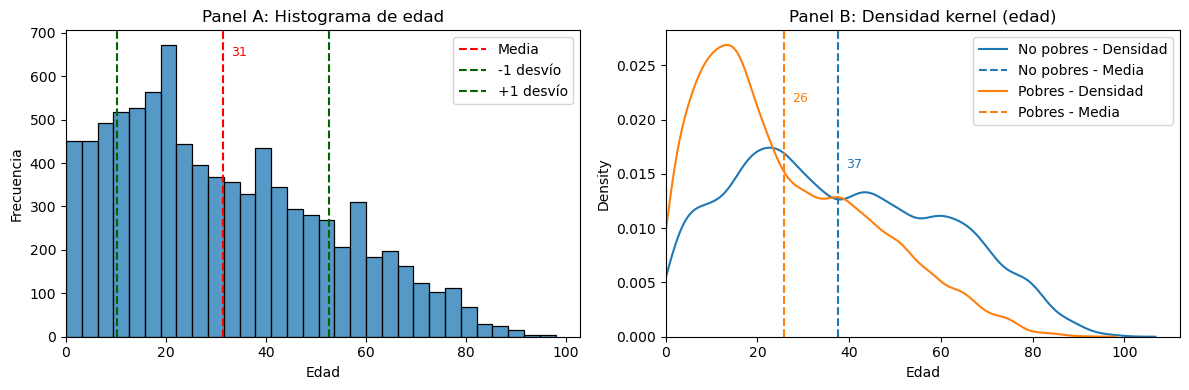

In [50]:
# Elegí el dataframe a graficar
df = respondieron  # o matrizej

# Asegurar tipo numérico
df = df.copy()
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ---------- Panel A: Histograma de edad ----------
sns.histplot(df['edad'], bins='auto', ax=axes[0], edgecolor='black')
axes[0].set_title('Panel A: Histograma de edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Media y ±1σ (totales)
mu = df['edad'].mean()
sd = df['edad'].std(ddof=1)
mu_int = int(round(mu))

axes[0].axvline(mu, color='red', linestyle='--', linewidth=1.5, label='Media')
axes[0].axvline(mu - sd, color='darkgreen', linestyle='--', linewidth=1.5, label='-1 desvío')
axes[0].axvline(mu + sd, color='darkgreen', linestyle='--', linewidth=1.5, label='+1 desvío')
axes[0].set_xlim(left=0)
# Etiqueta horizontal, con pequeño offset para no “tocar” la línea
ymax0 = axes[0].get_ylim()[1]
axes[0].annotate(f'{mu_int}', xy=(mu, ymax0*0.95), xytext=(6, 0),
                 textcoords='offset points', ha='left', va='top', color='red', fontsize=9)
axes[0].legend()

# ---------- Panel B: KDE por pobreza (media con mismo color) ----------
ypos_fracs = [0.90, 0.80]  # alturas relativas para ubicar cada etiqueta y evitar solapado
for i, (valor, etiqueta) in enumerate([(0, 'No pobres'), (1, 'Pobres')]):
    sub = df.loc[df['pobre'] == valor, 'edad'].dropna()
    if len(sub) > 1:
        ax = sns.kdeplot(sub, ax=axes[1], bw_adjust=0.7, clip=(0, None),
                         label=f'{etiqueta} - Densidad')
        color = ax.get_lines()[-1].get_color()
        mu_g = sub.mean()
        mu_g_int = int(round(mu_g))
        # Línea de media con el mismo color
        axes[1].axvline(mu_g, color=color, linestyle='--', linewidth=1.5,
                        label=f'{etiqueta} - Media')
        # Etiqueta horizontal con pequeño offset para no chocar con la línea
        ymax1 = axes[1].get_ylim()[1]
        axes[1].annotate(f'{mu_g_int}', xy=(mu_g, ymax1*ypos_fracs[i]), xytext=(6, 0),
                         textcoords='offset points', ha='left', va='top',
                         color=color, fontsize=9)

axes[1].set_title('Panel B: Densidad kernel (edad)')
axes[1].set_xlabel('Edad')
axes[1].set_xlim(left=0)
axes[1].legend()

plt.tight_layout()
fig.savefig("panel_edad_seaborn.png", dpi=300, bbox_inches="tight")
plt.show()